In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df_books=pd.read_csv('books.csv')
df_books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [51]:
df_book_tags=pd.read_csv('book_tags.csv')
df_book_tags.head(5)

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78


In [52]:
df_ratings=pd.read_csv('ratings.csv')
df_ratings.head(5)

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


# 1. How many books do not have an original title [books.csv]?

In [53]:
no_original_title=df_books['original_title'].isnull().sum()
print(no_original_title,'Books does not have "original_title"')

36 Books does not have "original_title"


# 2. How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [61]:
df1_books=df_books.dropna(subset=['original_title'])
print(df1_books.shape)

#After removing null values from 3 datsets
df1_book_tags=df_book_tags[df_book_tags['goodreads_book_id'].isin(df1_books['book_id'])]
df1_book_tags

df1_ratings=df_ratings[df_ratings['book_id'].isin(df1_books['book_id'])]
df1_ratings

unique_ids=len(pd.unique(df1_books['book_id']))
print(unique_ids,"Unique Books are present in Books.csv file")

(363, 24)
363 Unique Books are present in Books.csv file


# 3.How many unique users are present in the dataset [ratings.csv] ?

In [55]:
unique_users=pd.unique(df1_ratings['user_id'])
unique_users
print(len(unique_users),'Unique users are present in "ratings.csv"')

40573 Unique users are present in "ratings.csv"


# 4.How many unique tags are there in the dataset [book_tags.csv] ?

In [56]:
unique_tags=pd.unique(df1_book_tags['tag_id'])
unique_tags
print(len(unique_tags),'Unique tags are present in "book_tags.csv"')

100 Unique tags are present in "book_tags.csv"


# 5.Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [57]:
tag_ids=df1_book_tags['tag_id'].value_counts()
print(tag_ids)
#As we can every tag only repeated one time so we need to sort index values in and print least index
tag_ids=tag_ids.sort_index()
print("The most frequently used tag id is:",tag_ids.idxmax(),"and it occured:",tag_ids.max(),"times")

30574    1
7805     1
18367    1
10644    1
29452    1
        ..
11590    1
22743    1
5207     1
19961    1
22011    1
Name: tag_id, Length: 100, dtype: int64
The most frequently used tag id is: 199 and it occured: 1 times


# 6.Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [58]:
#Here we need to work on two datasets there is relationship between 
#these two datasets on book_id and goodreads_book id column so we need to join together for that use merge

#Here we are using inner join so i have used old dataset only 
#because by default it takes common values from both datasets
df_merged=pd.merge(df_book_tags,df_books,left_on="goodreads_book_id",right_on="book_id")
title_counts=df_merged.groupby('title')['count'].sum();

print("The most number of tags given by user to book title is:",title_counts.idxmax())
print("The number of tags given by users are:",title_counts.max())


The most number of tags given by user to book title is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters
The number of tags given by users are: 24348


# 7.Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

tag_id
30574    22451
13561      301
7778       178
11557      165
13547      164
8717        91
21689       76
19733       46
11743       41
21773       37
14552       32
4044        31
4605        28
7806        26
15782       25
19742       23
7739        23
13568       22
12553       21
27199       18
Name: count, dtype: int64


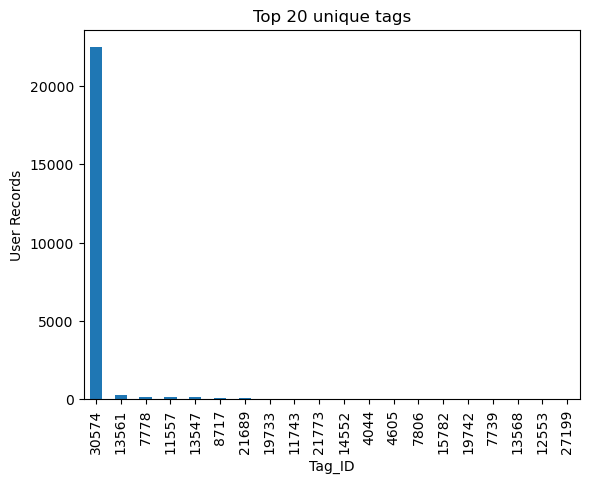

In [59]:
unique_tags=df1_book_tags.groupby('tag_id')['count'].sum()

unique_tags=unique_tags.sort_values(ascending=False)
#So we need to only top 20 so we have already sorted in descending order we cam top 2o using head(20)
top_20_tags=unique_tags.head(20)

print(top_20_tags)
top_20_tags.plot(kind='bar')
plt.xlabel('Tag_ID')
plt.ylabel('User Records')
plt.title("Top 20 unique tags")
plt.show()
